In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
#Checking if the df is okay:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Checking if there is missing data:
print(df.isnull().sum()) 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
#Normalization of the 'sqft_living' column: 
df['sqft_living'] = df['sqft_living'] / df['sqft_living'].max()  
df['sqft_living']

0        0.087149
1        0.189808
2        0.056869
3        0.144756
4        0.124077
           ...   
21608    0.112999
21609    0.170606
21610    0.075332
21611    0.118168
21612    0.075332
Name: sqft_living, Length: 21613, dtype: float64

In [5]:
#Removing the id and date columns since they have no role:
df.drop(['id','date'], axis = 1, inplace = True) 
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,0.087149,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,0.189808,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,0.056869,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,0.144756,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,0.124077,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Correlation matrix:
df.corr() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Text(0.5, 1.0, 'sqft_living vs price Regression Plot')

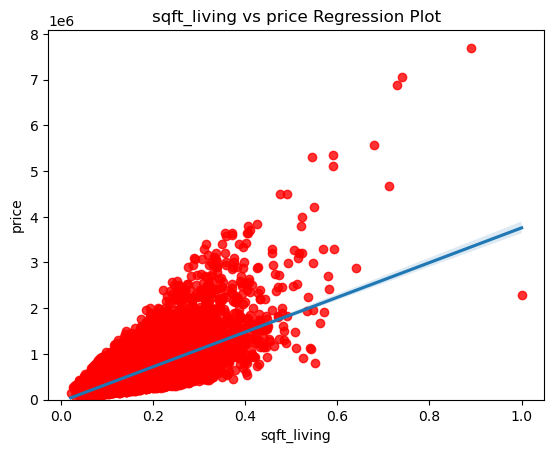

In [7]:
 #Regression Plot: 
sns.regplot(x = 'sqft_living', y = 'price', data = df, scatter_kws={'color':'red'})
plt.ylim(0,)
plt.title('sqft_living vs price Regression Plot')

In [8]:
#Train_Test_Split Method: 
x_data = df[['bedrooms', 'bathrooms', 'sqft_living', 'view','grade']]
y_data = df['price']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0) 

In [9]:
#Linear Regression: 
lr = LinearRegression()

lr.fit(x_train, y_train)
y_predicted = lr.predict(x_test)

r2 = r2_score(y_test, y_predicted)

print(f"R2 score: {r2}") #R2 score can be better, so the Polynomial Regression can be tried

R2 score: 0.571154182688224


In [10]:
#Polynomail Regression:
order = [1,2,3,4,5]
r_scores = []

for n in order : 
    pr1 = PolynomialFeatures(degree = n)
    lr1 = LinearRegression()
    
    x_train_pr1 = pr1.fit_transform(x_train)
    x_test_pr1 = pr1.transform(x_test)
    
    lr1.fit(x_train_pr1, y_train)
    
    r_scores.append(lr1.score(x_test_pr1, y_test))

r_scores #R2 score of the degree 2 will be used

[0.571154182688224,
 0.6306095743347718,
 0.6405754591464952,
 0.6085845682151467,
 -1.3842593239617003]

In [11]:
#Cross_Val Method: 
pr2 = PolynomialFeatures(degree = 2)
lr2 = LinearRegression()

x_pr2 = pr2.fit_transform(x_data)

r2_scores = cross_val_score(lr2, x_pr2, y_data, cv = 3)

print(f"Mean R²: {r2_scores.mean()}") #It needs to be improved, so the Ridge Regression can be tried
print(f"Std R²: {r2_scores.std()}") 

Mean R²: 0.5919350500495081
Std R²: 0.03514613659724454


In [12]:
#Ridge Regression and GridSearchCV
RR = Ridge(alpha = 1)
pr3 = PolynomialFeatures(degree = 2)

x_pr3 = pr3.fit_transform(x_data)

alpha_range = [{'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]

grid = GridSearchCV(RR, alpha_range, cv = 3, scoring='r2') #To find the best alpha
grid.fit(x_pr3, y_data)

best_alpha = grid.best_params_['alpha']
best_r2 = grid.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Mean R²: {best_r2}")

Best alpha: 100
Mean R²: 0.6191075761905109


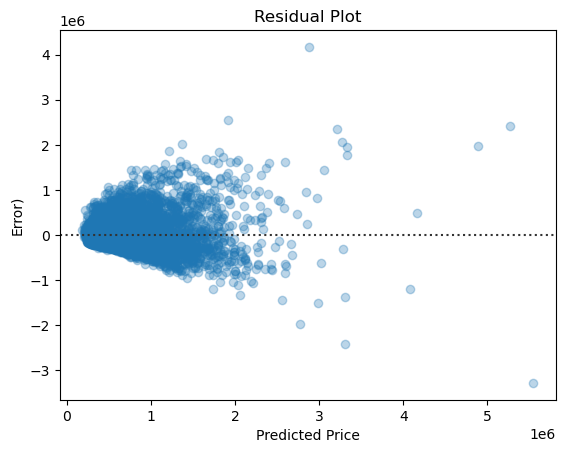

In [13]:
#Residual Plot
ridge_best = Ridge(alpha=100)
ridge_best.fit(x_pr3, y_data)

y_pred = ridge_best.predict(x_pr3)

sns.residplot(x=y_pred, y=y_data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.xlabel("Predicted Price")
plt.ylabel("Error)")
plt.title("Residual Plot")
plt.show() 

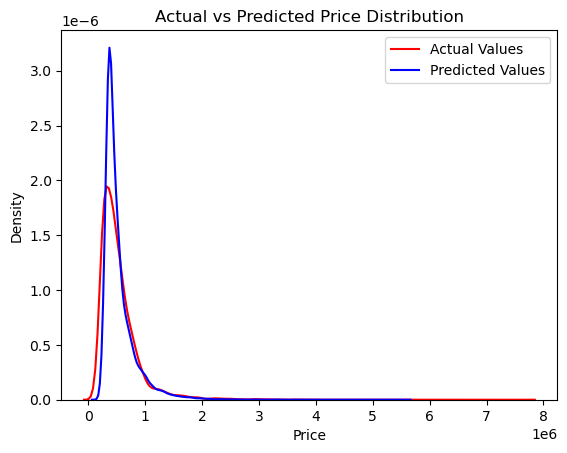

In [14]:
#Distribution Plot
ax = sns.kdeplot(df['price'], color='r', label='Actual Values')
sns.kdeplot(y_pred, color='b', label='Predicted Values', ax=ax)

plt.title('Actual vs Predicted Price Distribution')
plt.xlabel('Price')
plt.legend()
plt.show()